Question 1

In [8]:
"""
The current code given is for the Assignment 1.
You will be expected to use this to make trees for:
> discrete input, discrete output
> real input, real output
> real input, discrete output
> discrete input, real output
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
# Test case 1
# Real Input and Real Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))


for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

# Test case 2
# Real Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))


# Test case 3
# Discrete Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

# Test case 4
# Discrete Input and Real Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))


? (4 <= 0.2784337337408048)
  Y:     ? (0 <= 1.5077915869695468)
      Y:         ? (4 <= -1.7439789939378834)
          Y:             Predict: 0.6775702216048832
          N:             ? (4 <= -1.4454128458513593)
              Y:                 Predict: -0.9356641093905698
              N:                 ? (3 <= -0.8551506723714148)
                  Y:                     Predict: 0.33305303045715745
                  N:                     Predict: -0.3177896701602897
      N:         Predict: 1.1403586630966704
  N:     ? (4 <= 0.5279137383496604)
      Y:         Predict: 2.308481074621783
      N:         ? (0 <= -0.35665559739723524)
          Y:             Predict: 1.5121850450760803
          N:             ? (2 <= -0.4930671880785866)
              Y:                 Predict: -0.31676484770533875
              N:                 Predict: 0.470074537523149
Criteria : information_gain
RMSE:  0.4119593789943519
MAE:  0.34271675408464486
? (4 <= 0.2784337337408048)
  Y:   

Question 2 

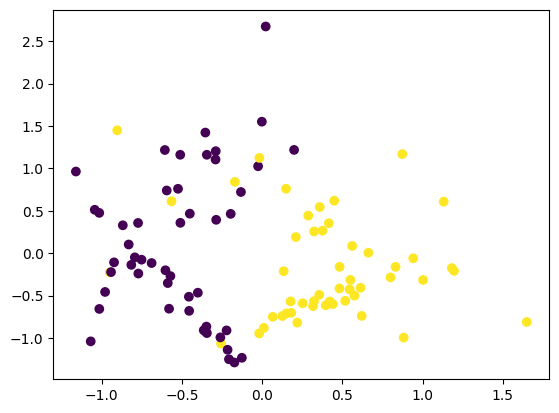

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

Question 2 (a)

In [13]:
# 1. Import required libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tree.base import DecisionTree
from metrics import accuracy, precision, recall  # assuming these are in metrics.py

X_df = pd.DataFrame(X,columns = ["Feature 1", "Feature 2"])
y_s = pd.Series(y)


# train and test splittingthe data 
X_train, X_test, y_train, y_test = train_test_split(X_df,y_s,test_size= 0.3, random_state = 42)

#Model fit 
tree = DecisionTree(criterion = "information gain", max_depth = 5)
tree.fit(X_train,y_train)

#predict
y_pred = tree.predict(X_test)

#Metrices
print("Accuracy:", accuracy(y_pred, y_test))

for cls in y_s.unique():
    print(f"Class {cls} - Precision:", precision(y_pred, y_test, cls))
    print(f"Class {cls} - Recall:", recall(y_pred, y_test, cls))

Accuracy: 0.8333333333333334
Class 1 - Precision: 0.8571428571428571
Class 1 - Recall: 0.8
Class 0 - Precision: 0.8125
Class 0 - Recall: 0.8666666666666667


Question 2(b)

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from tree.base import DecisionTree
from metrics import accuracy


# Define parameter range
depth_values = [1, 2, 3, 4, 5, 6]

# Outer 5-fold cross-validation
kf_outer = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

for train_index, test_index in kf_outer.split(X_df):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_sr.iloc[train_index], y_sr.iloc[test_index]

    # Inner CV to select best depth
    best_depth = None
    best_score = -np.inf

    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)
    for d in depth_values:
        inner_scores = []
        for inner_train, inner_val in kf_inner.split(X_train):
            X_inner_train, X_inner_val = X_train.iloc[inner_train], X_train.iloc[inner_val]
            y_inner_train, y_inner_val = y_train.iloc[inner_train], y_train.iloc[inner_val]

            tree = DecisionTree(criterion="information_gain", max_depth=d)
            tree.fit(X_inner_train, y_inner_train)
            y_val_pred = tree.predict(X_inner_val)
            inner_scores.append(accuracy(y_val_pred, y_inner_val))

        avg_score = np.mean(inner_scores)
        if avg_score > best_score:
            best_score = avg_score
            best_depth = d

    # Train on full training set using best depth
    final_tree = DecisionTree(criterion="information_gain", max_depth=best_depth)
    final_tree.fit(X_train, y_train)
    y_pred_outer = final_tree.predict(X_test)
    outer_scores.append(accuracy(y_pred_outer, y_test))

print("Cross-Validation Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))


Cross-Validation Scores: [0.95, 0.8, 0.85, 0.95, 0.95]
Mean Accuracy: 0.9


In [19]:
best_depths_per_fold = []  # store best depth for each fold

for train_index, test_index in kf_outer.split(X_df):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_sr.iloc[train_index], y_sr.iloc[test_index]

    best_depth = None
    best_score = -np.inf

    kf_inner = KFold(n_splits=5, shuffle=True, random_state=42)
    for d in depth_values:
        inner_scores = []
        for inner_train, inner_val in kf_inner.split(X_train):
            X_inner_train, X_inner_val = X_train.iloc[inner_train], X_train.iloc[inner_val]
            y_inner_train, y_inner_val = y_train.iloc[inner_train], y_train.iloc[inner_val]

            tree = DecisionTree(criterion="information_gain", max_depth=d)
            tree.fit(X_inner_train, y_inner_train)
            y_val_pred = tree.predict(X_inner_val)
            inner_scores.append(accuracy(y_val_pred, y_inner_val))

        avg_score = np.mean(inner_scores)
        if avg_score > best_score:
            best_score = avg_score
            best_depth = d

    best_depths_per_fold.append(best_depth)  # Save best depth for this outer fold

print("Best Depths per Fold:", best_depths_per_fold)


Best Depths per Fold: [1, 1, 1, 2, 1]
